<a href="https://colab.research.google.com/github/kianakiaei/TensorFlow/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# introduction to neural network classification with tensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification



## Creating data to view and fit


In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
x, y = make_circles(n_samples,
                    noise=0.03, 
                    random_state=42)

In [ ]:
# Check out features
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is a little hard to understand right now... let's visualize it!

In [ ]:
import pandas as pd

circles = pd.DataFrame({"x0":x[:, 0], "x1":x[:, 1], "label":y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


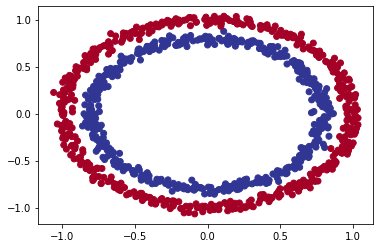

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt

# c is color
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);

Spend playing around http://playground.tensorflow.org building and running different neural networks. See what happens when you change different hyperparameters.

## Input and output shapes

In [ ]:
# Check the shapes of our features and labels
x.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working
len(x), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels
x[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Step in modelling

The steps in modelling with TensorFlow are typically:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweek
6. Evaluate...

In [ ]:
import tensorflow as tf

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(x, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4830


In [ ]:
# Lets's try and improve our model by training for longer...

model_1.fit(x, y, epochs=200, verbose=0)
model_1.evaluate(x, y)

32/32 [==============================] - 0s 932us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if guessing.

So let's step things up a notch and add extra layer.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(x, y, epochs=100, verbose=0)

In [ ]:
# 4. Evaluate the model
model_2.evaluate(x, y)

# we add extra layer but accuracy not change

32/32 [==============================] - 0s 940us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

In [ ]:
circles["label"].value_counts()

# Data is ballanced

1    500
0    500
Name: label, dtype: int64

# Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100), # add 100 dense neurons
                               tf.keras.layers.Dense(10), # add another layer with 10 neurons
                               tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(x, y, epochs=100, verbose=0)

In [ ]:
# 4. Evaluate the model
model_3.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

**Note:** Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: **visualize, visualize, visualize**. Inspect your data, inspect your model, inspect your model's predictions.

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (x) and labels (y)
* Create a meshgrid of the different x values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

## visualize

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model, x, y):
  """
  Plots the decision boundary created by a model predicting on x.
  This function was inspired by two resources:
  1. https://cs231n.github.io/neural-networks-case-study/
  2. https://github.com/GokuMohandas/MadeWithML
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create x value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stach 2D arrays together    

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  #Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


In [ ]:
x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

doing binary classification


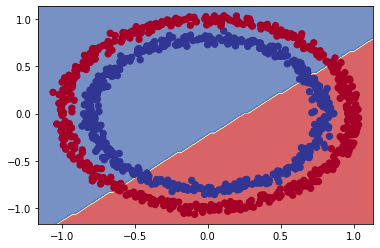

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       x=x,
                       y=y)

Now we find why accuracy did not increase

## The missing piece: Non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API
model_4 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, activation="linear")
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer="Adam", # if we write this, can not set lr
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(x, y, epochs=100, verbose=0)

In [ ]:
model_4.evaluate(x, y)

32/32 [==============================] - 0s 990us/step - loss: 3.2448 - accuracy: 0.4560


[3.2447562217712402, 0.4560000002384186]

doing binary classification


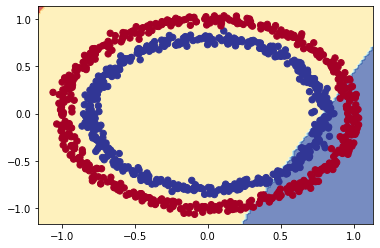

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_4,
                       x=x,
                       y=y)

if blue points are in blue class and red points are in red class, mean right. yellow is crossover.

Let's try build our first neural network with a non-linear activation function

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API
model_5 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer="Adam", # if we write this, can not set lr
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(x, y, epochs=100, verbose=0)

In [ ]:
model_5.evaluate(x, y)

32/32 [==============================] - 0s 935us/step - loss: 3.2448 - accuracy: 0.4560


[3.2447562217712402, 0.4560000002384186]

doing binary classification


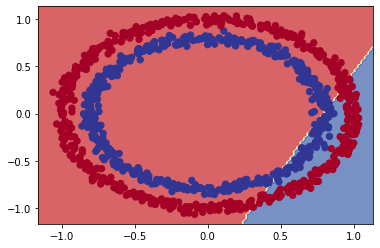

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_5,
                       x=x,
                       y=y)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API
model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu")
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer="Adam", # if we write this, can not set lr
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(x, y, epochs=100, verbose=0)

In [ ]:
model_6.evaluate(x, y)

32/32 [==============================] - 0s 988us/step - loss: 0.6643 - accuracy: 0.3780


[0.6642990708351135, 0.3779999911785126]

doing multiclass classification


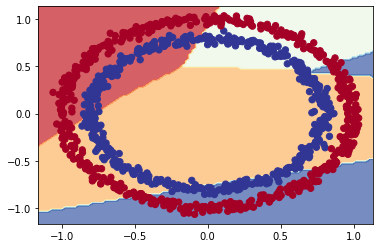

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_6,
                       x=x,
                       y=y)

it's binary class. it's better we have 1 neuron in output layer.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API
model_7 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer="Adam", # if we write this, can not set lr
                metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(x, y, epochs=100, verbose=0)

In [ ]:
model_7.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classification


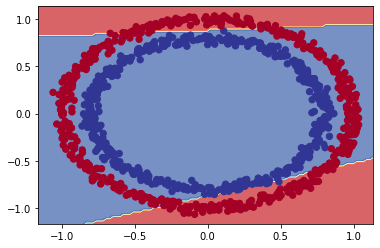

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_7,
                       x=x,
                       y=y)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API
model_8 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(4, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer="Adam", # if we write this, can not set lr
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(x, y, epochs=100, verbose=0)

In [ ]:
model_8.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

doing binary classification


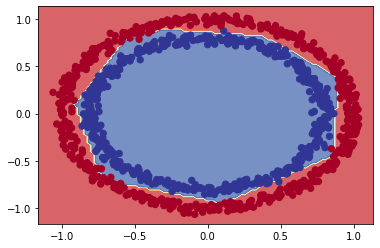

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_8,
                       x=x,
                       y=y)

Now we've discussed the consept of linear and non-linear functions (or lines), let's see them in action.

## Sigmoid activation function

Nice, now let's recreate the sigmoid function and see what it does to our data. You can also find a pre-built sigmoid function at `tf.keras.activations.sigmoid`.

In [59]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

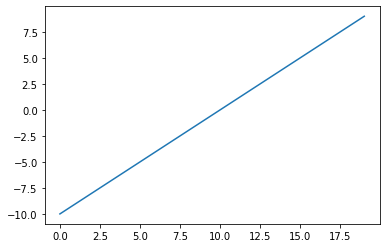

In [60]:
# Visualize our toy tensor
plt.plot(A);

In [61]:
# Sigmoid - https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

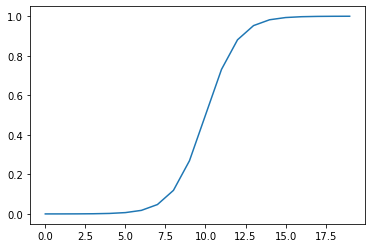

In [62]:
# Plot sigmoid modified tensor
plt.plot(sigmoid(A));